In [1]:
import numpy as np

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 8,8

In [4]:
import cv2

In [18]:
img = cv2.imread("NYC-01.jpg")
img.shape

(2160, 2160, 3)

(100, 100)


(-0.5, 1999.5, 1999.5, -0.5)

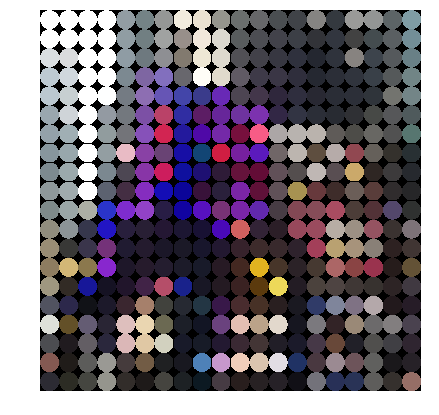

In [73]:
N = 2160

img0 = img
img1 = 0*img0

L = 50

dn = np.arange(2*L) - L
dz = dn[None,...] + dn[...,None]*1j

print(dz.shape)

for m in range(int(N/2/L)):
    for n in range(int(N/2/L)):

        a,b = 2*m*L, 2*n*L

        mask = ( dz.real**2 + dz.imag**2 < L**2)

        img1[ a + L + dz[mask].real.astype(int), b + L + dz[mask].imag.astype(int), :] = \
        0*img0[ a + L + dz[mask].real.astype(int), b + L + dz[mask].imag.astype(int), :] + \
        1*img0[ a + L , b + L]

        mask = ( dz.real**2 + dz.imag**2 > L**2)

        img1[ a + L + dz[mask].real.astype(int), b + L + dz[mask].imag.astype(int), :] = \
        0*img0[ a + L + dz[mask].real.astype(int), b + L + dz[mask].imag.astype(int), :] + \
        0*img0[ a + L , b + L]

plt.imshow(img1[ :2000, :2000,[2,1,0]])
plt.axis("Off")

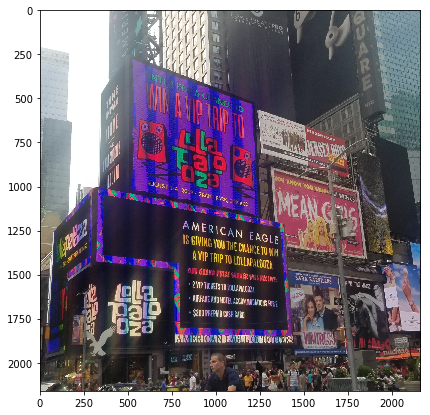

In [63]:
plt.imshow(img[:,:,[2,1,0]])

(50, 50)
(50, 50)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1999.5, 1999.5, -0.5)

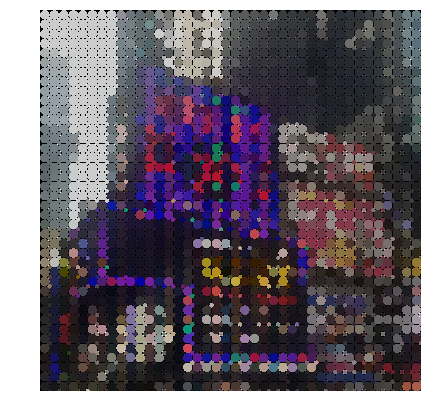

In [103]:
N = 2160

L0 = 25

img0 = img
img1 = 0*img0

L = L0

dn = np.arange(2*L) - L
dz = dn[None,...] + dn[...,None]*1j

print(dz.shape)

for m in range(int(N/2/L)):
    for n in range(int(N/2/L)):

        a,b = 2*m*L, 2*n*L

        mask = ( dz.real**2 + dz.imag**2 < L**2)

        img1[ a + L + dz[mask].real.astype(int), b + L + dz[mask].imag.astype(int), :] = \
        0*img0[ a + L + dz[mask].real.astype(int), b + L + dz[mask].imag.astype(int), :] + \
        1*img0[ a + L , b + L]

        mask = ( dz.real**2 + dz.imag**2 > L**2)

        img1[ a + L + dz[mask].real.astype(int), b + L + dz[mask].imag.astype(int), :] = \
        0*img0[ a + L + dz[mask].real.astype(int), b + L + dz[mask].imag.astype(int), :] + \
        0*img0[ a + L , b + L]

img2 = 0*img0
        
L = L0

dn = np.arange(2*L) - L
dz = dn[None,...] + dn[...,None]*1j

print(dz.shape)

for m in range(int(N/2/L)-1):
    for n in range(int(N/2/L)-1):

        a,b = 2*m*L, 2*n*L

        mask = ( dz.real**2 + dz.imag**2 < L**2*(2**0.5-1.00)*0.5)

        img2[ a + 2*L + dz[mask].real.astype(int), b + 2*L + dz[mask].imag.astype(int), :] = \
        0*img0[ a + 2*L + dz[mask].real.astype(int), b + 2*L + dz[mask].imag.astype(int), :] + \
        1*img0[ a + 2*L , b + L]

        mask = ( dz.real**2 + dz.imag**2 > L**2*(2**0.5-1.00)*0.5)

        img2[ a + 2*L + dz[mask].real.astype(int), b + 2*L + dz[mask].imag.astype(int), :] = \
        0*img0[ a + 2*L + dz[mask].real.astype(int), b + 2*L + dz[mask].imag.astype(int), :] + \
        0*img0[ a + 2*L , b + 2*L]
        
img3 = (0.8*img1 + 0.8*img2).astype(int)
        
plt.imshow(img3[ :2000, :2000,[2,1,0]])
plt.axis("Off")

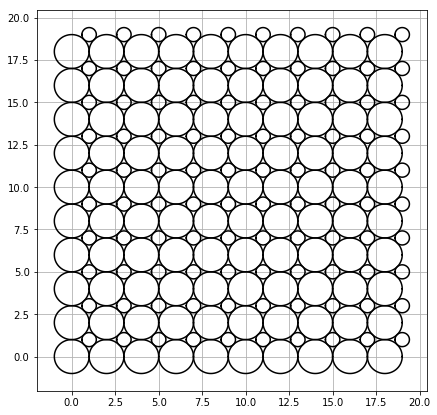

In [108]:
t = np.arange(0,1.01,0.01)
z = np.exp(2j*np.pi*t)

for a in range(10):
    for b in range(10):
        w = 2*(a+1j*b) + z
        plt.plot(w.real, w.imag, 'k-')
        
for a in range(10):
    for b in range(10):
        w = 2*(a+1j*b) + (1+1j) + z*(1 - 2**0.5)
        plt.plot(w.real, w.imag, 'k-')

#plt.axis("Off")
plt.grid(True)

In [6]:
img = cv2.imread("times-square-02.jpg")
img.shape

(762, 640, 3)

In [33]:
img1 = 0*img + img

x = np.arange(762)
y = np.arange(640)

img1[x[None,...], y[...,None],:] = img1[50*(x[None,...]//50),25*(y[...,None]//25),:]

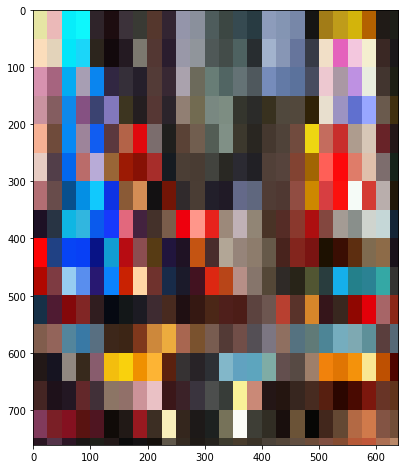

In [34]:
plt.imshow(img1[:,:,[2,1,0]])

(-0.5, 619.5, 759.5, -0.5)

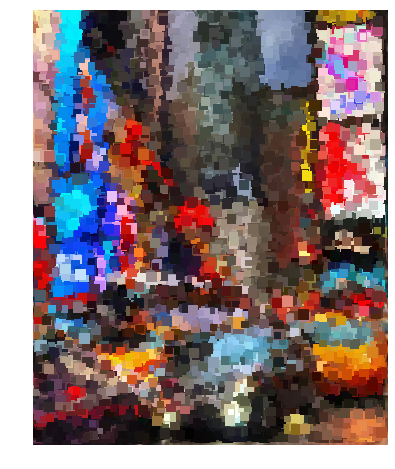

In [83]:
img1 = 0*img + img

x = np.arange(762)
y = np.arange(640)

for t in range(20000):

    a, b = int(740*np.random.random()), int(600*np.random.random())
    L = int(10*np.random.random()) + 10

    x0 = a + np.arange(L)
    y0 = b + np.arange(L)

    img1[ x0[None,...] , y0[...,None] , :] = img[ a , b , :]

plt.imshow(img1[:760,:620,[2,1,0]])
plt.axis("Off")

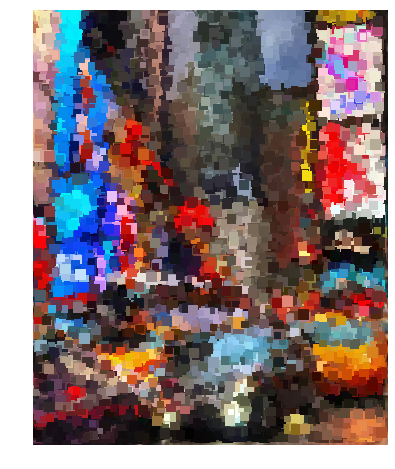

In [86]:
fig = plt.figure()

plt.tight_layout()

plt.axis("Off")

plt.imshow( img1[ :760 , :620 , [2,1,0]])

#ax.autoscale_view('tight')

#plt.subplots_adjust(left=-0.05, right=1.0, top=1.0, bottom=0.0)

plt.savefig("times-square-04.jpg", bbox_inches="tight", dpi = 300)

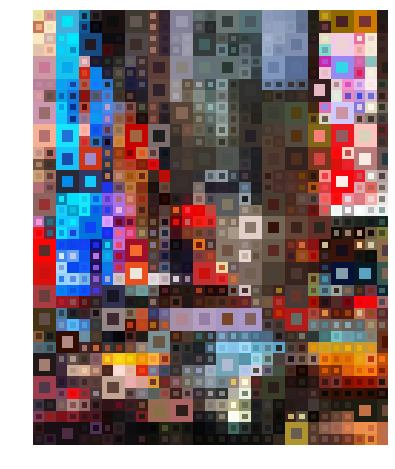

In [116]:
img1 = 0*img + img

x = np.arange(762)
y = np.arange(640)

for m in range(38):
    for n in range(31):

        a, b = m*20, n*20
        L = 20

        x0 = a + np.arange(L)
        y0 = b + np.arange(L)

        img1[ x0[None,...] , y0[...,None] , :] = img[ a , b , :]
        
        a, b = m*20 + 5, n*20 + 5
        L = 10

        x0 = a + np.arange(L)
        y0 = b + np.arange(L)

        img1[ x0[None,...] , y0[...,None] , :] = img[ a , b , :]
        
for t in range(125):
        
        L = 40
        a, b = L*int((760/40)*np.random.random()), L*int((640/40)*np.random.random())

        x0 = a + np.arange(L)
        y0 = b + np.arange(L)

        img1[ x0[None,...] , y0[...,None] , :] = img[ a , b , :]

        L = 20
        c, d = a + L, b + L


        x0 = a + np.arange(L) + 10
        y0 = b + np.arange(L) + 10

        img1[ x0[None,...] , y0[...,None] , :] = img[ c , d , :]

plt.imshow(img1[:760,:620,[2,1,0]])
plt.axis("Off")

plt.savefig("times-square-07.jpg", bbox_inches="tight", dpi = 300)